In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [5]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [7]:
df_train.head(4)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [9]:
df_test.head(5)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,45.479888,9.196298
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,52.370545,4.888644


In [10]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

Первоначальная версия датасета содержит 17 полей со следующей информацией:

hotel_address — адрес отеля;

review_date — дата, когда рецензент разместил соответствующий отзыв;

average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;

hotel_name — название отеля;

reviewer_nationality — страна рецензента;

negative_review — отрицательный отзыв, который рецензент дал отелю;

review_total_negative_word_counts — общее количество слов в отрицательном отзыв;

positive_review — положительный отзыв, который рецензент дал отелю;

review_total_positive_word_counts — общее количество слов в положительном отзыве.

reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;

total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;

total_number_of_reviews — общее количество действительных отзывов об отеле;

tags — теги, которые рецензент дал отелю;

days_since_review — количество дней между датой проверки и датой очистки;

additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.

lat — географическая широта отеля;
lng — географическая долгота отеля.

***
Поиск выбросов

In [14]:
data['review_date'] = pd.to_datetime(data['review_date'])
data['review_date'].sort_values()

#выбросов и аномальных значений нет

208558   2015-08-04
42917    2015-08-04
481330   2015-08-04
298411   2015-08-04
10715    2015-08-04
            ...    
390278   2017-08-03
440164   2017-08-03
480265   2017-08-03
180065   2017-08-03
45365    2017-08-03
Name: review_date, Length: 515738, dtype: datetime64[ns]

In [15]:
#histplot = sns.histplot(data=data, x='additional_number_of_scoring', ax=axes[0]);
#histplot.set_title('additional_number_of_scoring');


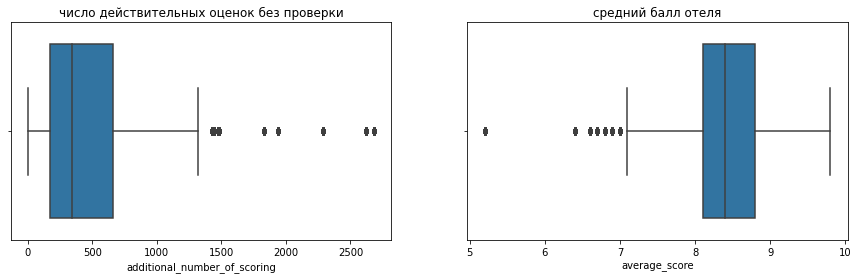

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
boxplot = sns.boxplot(data=data, x='additional_number_of_scoring', ax=axes[0]);
boxplot.set_title('число действительных оценок без проверки');
boxplot = sns.boxplot(data=data, x='average_score', ax=axes[1]);
boxplot.set_title('средний балл отеля');


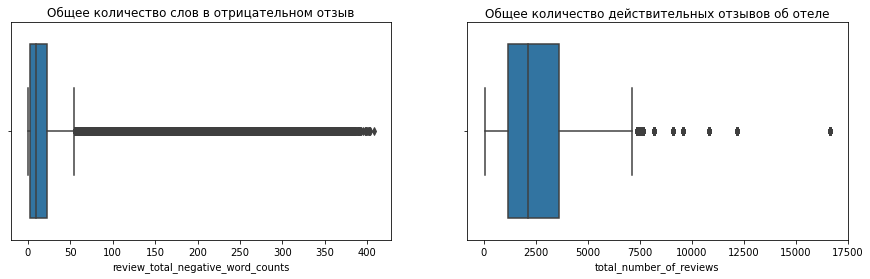

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
boxplot = sns.boxplot(data=data, x='review_total_negative_word_counts', ax=axes[0]);
boxplot.set_title('Общее количество слов в отрицательном отзыв');
boxplot = sns.boxplot(data=data, x='total_number_of_reviews', ax=axes[1]);
boxplot.set_title('Общее количество действительных отзывов об отеле');

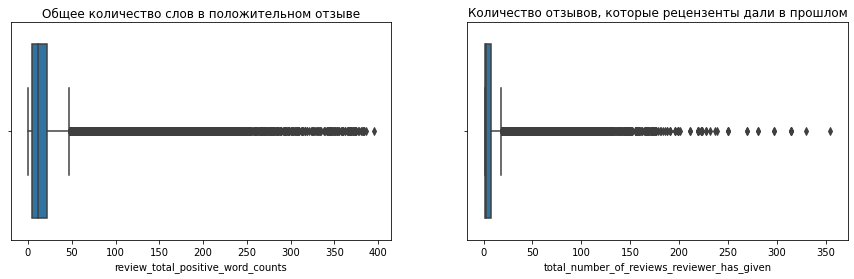

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
boxplot = sns.boxplot(data=data, x='review_total_positive_word_counts', ax=axes[0]);
boxplot.set_title('Общее количество слов в положительном отзыве');
boxplot = sns.boxplot(data=data, x='total_number_of_reviews_reviewer_has_given', ax=axes[1]);
boxplot.set_title('Количество отзывов, которые рецензенты дали в прошлом');

In [19]:
#визуально выбросы не обнаружила, кроме как в признаке total_number_of_reviews. 
data[data['total_number_of_reviews'] == 16670]['hotel_name'].value_counts()

#Все они принадлежат одному отелю Hotel Da Vinci
#Сравнила с количеством отзывов данного отеля на сайте booking, число 4935 против 16670 в датасете.
#Решила заменить 16670 на 4935 (несмотря на то, что 4935 на момент 2023 года, оно ближе к правле чем 16670)


Hotel Da Vinci    1877
Name: hotel_name, dtype: int64

In [20]:
data2 = data.copy()
data2['total_number_of_reviews'] = data2['total_number_of_reviews'].apply(lambda x:4935 if x == 16670 else x)
data2['total_number_of_reviews']

0         4935
1         5018
2          351
3         1543
4         4687
          ... 
515733     617
515734    3224
515735    2751
515736    1567
515737    1209
Name: total_number_of_reviews, Length: 515738, dtype: int64

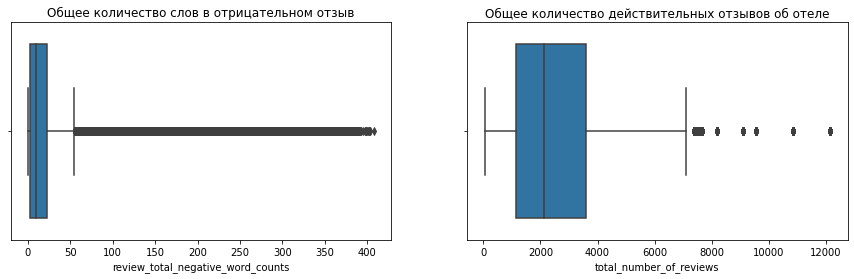

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
boxplot = sns.boxplot(data=data2, x='review_total_negative_word_counts', ax=axes[0]);
boxplot.set_title('Общее количество слов в отрицательном отзыв');
boxplot = sns.boxplot(data=data2, x='total_number_of_reviews', ax=axes[1]);
boxplot.set_title('Общее количество действительных отзывов об отеле');

***
Заполнить пропущенные координаты

In [22]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [23]:
#from geopy.geocoders import Nominatim
#import time
#from pprint import pprint
#Обратите внимание, что мы выбрали геокодер Nominatim, теперь создаем его новый экземпляр:

# instantiate a new Nominatim client
#app = Nominatim(user_agent="tutorial")
#Теперь давайте попробуем получить географические данные по адресу:

# get location raw data
#location = app.geocode("Via Senigallia 6 20161 Milan Italy")
# print raw data
#print(location.address)
#print((location.latitude, location.longitude))


In [24]:
#Проанализируйте представленный датасет и перечислите все числовые признаки через запятую.
#Числовые признаки, как и количественные, отражают количество чего-либо. Например, доход в 20 000 руб. — это числовой признак.
# в данном датасете чиловые признаки: все int и float, days_since_review

In [25]:
#Числовые признаки датасета: 
numeric_columns = [s for s in data2.columns if data2[s].dtypes == 'int64'
                   or data2[s].dtypes == 'float64']    
numeric_columns

['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'lat',
 'lng',
 'sample',
 'reviewer_score']

In [26]:
#Object признаки датасета:
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
object_columns

['hotel_address',
 'hotel_name',
 'reviewer_nationality',
 'negative_review',
 'positive_review',
 'tags',
 'days_since_review']

In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

****Работа с пропущенными данными****

In [28]:
data2.isnull().sum()
#пропущенных значений в признаках lat и lng < 30% (а именно около 0,05%), 
#следовательно эти данные нужно заполнить 

hotel_address                                    0
additional_number_of_scoring                     0
review_date                                      0
average_score                                    0
hotel_name                                       0
reviewer_nationality                             0
negative_review                                  0
review_total_negative_word_counts                0
total_number_of_reviews                          0
positive_review                                  0
review_total_positive_word_counts                0
total_number_of_reviews_reviewer_has_given       0
tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
sample                                           0
reviewer_score                                   0
dtype: int64

In [29]:
import numpy as np
np.where(pd.isnull(data2))


(array([    35,     35,    293, ..., 515637, 515699, 515699]),
 array([14, 15, 14, ..., 15, 14, 15]))

!!!!!

In [30]:
data2.iloc[44,0] #41.39173309493271, 2.17792618312499 2802

'58 Shepherds Bush Green Hammersmith and Fulham London W12 8QE United Kingdom'

In [31]:
data2[data2['hotel_name'].str.contains ("Hotel Advance")].shape[0]

28

Заполнение пропущенных данных вручную


In [32]:
data2.loc[data2.hotel_name == 'Hotel Advance', ['lat', 'lng']] = 41.383407518850895, 2.1629817831245615
data2.loc[data2.hotel_name == 'Hotel Park Villa', ['lat', 'lng']] = 48.23793324345512, 16.345322775328277
data2.loc[data2.hotel_name == 'Roomz Vienna', ['lat', 'lng']] = 48.188078186156886, 16.420748488828526
data2.loc[data2.hotel_name == 'Derag Livinghotel Kaiser Franz Joseph Vienna', ['lat', 'lng']] = 48.24608732273401, 16.34181087979875
data2.loc[data2.hotel_name == 'Renaissance Barcelona Hotel', ['lat', 'lng']] = 41.394114115924275, 2.1670981104597677
data2.loc[data2.hotel_name == 'Austria Trend Hotel Schloss Wilhelminenberg Wien', ['lat', 'lng']] = 48.21971948712379, 16.285549181648662
data2.loc[data2.hotel_name == 'Hotel Pension Baron am Schottentor', ['lat', 'lng']] = 48.216956843996066, 16.35998079884372
data2.loc[data2.hotel_name == 'Mercure Paris Gare Montparnasse', ['lat', 'lng']] = 48.84011574253903, 2.323551071104008
data2.loc[data2.hotel_name == 'Hotel Daniel Vienna', ['lat', 'lng']] = 48.188943519304196, 16.38381148349835
data2.loc[data2.hotel_name == 'NH Collection Barcelona Podium', ['lat', 'lng']] = 41.39173309493271, 2.17792618312499
data2.loc[data2.hotel_name == 'Cordial Theaterhotel Wien', ['lat', 'lng']] = 48.20969894237849, 16.351431093287676
data2.loc[data2.hotel_name == 'Hotel City Central', ['lat', 'lng']] = 48.21374417973961, 16.379843806781427
data2.loc[data2.hotel_name == 'City Hotel Deutschmeister', ['lat', 'lng']] = 48.220959094233685, 16.36662222582838
data2.loc[data2.hotel_name == 'Holiday Inn Paris Montmartre', ['lat', 'lng']] = 48.889064368686796, 2.3330993528519257
data2.loc[data2.hotel_name == 'Hotel Atlanta', ['lat', 'lng']] = 48.220662, 16.355555
data2.loc[data2.hotel_name == 'Fleming s Selection Hotel Wien City', ['lat', 'lng']] = 48.20950186842292, 16.35337049514036
data2.loc[data2.hotel_name == 'Maison Albar Hotel Paris Op ra Diamond', ['lat', 'lng']] = 48.87543722919775, 2.3233383528511165


In [33]:
#!!! важно: data2.loc[data2.hotel_name == 'Hotel Atlanta', ['lat', 'lng']] = 48.220662, 16.355555

****Cоздание новых признаков из адреса: страна, город, почтовый индекс****

In [34]:
def get_country(adress):
    country_list = adress.split(' ')
    country = country_list[-1]
    if country_list[-1] == 'Kingdom':
        country = ' '.join(country_list[-2:])
    return country

data2['country'] = data2['hotel_address'].apply(get_country)

In [190]:
data2['country'].value_counts()



United Kingdom    262301
Spain              60149
France             59928
Netherlands        57214
Austria            38939
Italy              37207
Name: country, dtype: int64

In [36]:
def get_city(adress):
    city_list = adress.split(' ')
    city = city_list[-2]
    if city_list[-1] == 'Kingdom':
        city = city_list[-5]
    return city

data2['city'] = data2['hotel_address'].apply(get_city)

In [37]:
data2['city'].value_counts().index

Index(['London', 'Barcelona', 'Paris', 'Amsterdam', 'Vienna', 'Milan'], dtype='object')

In [38]:
def get_mail_index(arg):
    if arg.split()[-1] == 'Kingdom':
        return arg.split()[-4] + ' ' + arg.split()[-3]
    else:
        return arg.split()[-3]


In [39]:
data2['mail_index'] = data2['hotel_address'].apply(get_mail_index)

In [40]:
data2['mail_index'].value_counts().index


Index(['1010', '20124', '75008', '08002', '75001', '75009', '20121', 'E14 9SJ',
       '75015', '08007',
       ...
       'EC2A 4PJ', 'SW1X 7DJ', 'SW3 2DB', 'W1K 1PN', 'WC2E 8QH', '20141',
       '1230', 'JW', 'E2 7DD', '92120'],
      dtype='object', length=587)

****Создание признака: население и плозадь города****

In [41]:
сity_population = {
    'Paris':  2148327, 'London': 8908081, 'Milan': 1366180, 
    'Vienna': 1911191, 'Barcelona': 1636732, 'Amsterdam': 860124
}
сity_area = {
    'Paris': 105, 'London': 1706, 'Milan': 181, 
    'Vienna': 414, 'Barcelona': 101, 'Amsterdam': 219
}

data2['сity_population'] = data2['city'].map(сity_population)
data2['сity_area'] = data2['city'].map(сity_area)

In [42]:
#создание нового признака координат в виде кортежей для рассчета расстояния от центра города
data2['lat_lng'] = data2[['lat', 'lng']].apply(tuple, axis=1)

In [43]:
#функция для расчета расстояния от центра города
def centre_distance(row):
    London = (51.51143582402752, -0.1380020552197451) #координаты центров городов  
    Milan = (45.46849357704609, 9.189434612388302)
    Barcelona = (41.39482258629099, 2.1737422521918854)
    Vienna = (48.21141656173553, 16.377987973264805)
    Paris = (48.8606324813956, 2.3590483060188556)
    Amsterdam = (52.37300010230033, 4.913562460478998)
    from geopy import distance
    if row['city'] == 'London':
        distance_km = distance.distance(London, row['lat_lng']).km
    elif row['city'] == 'Milan':
        distance_km = distance.distance(Milan, row['lat_lng']).km
    elif row['city'] == 'Barcelona':
        distance_km = distance.distance(Barcelona, row['lat_lng']).km
    elif row['city'] == 'Vienna':
        distance_km = distance.distance(Vienna, row['lat_lng']).km
    elif row['city'] == 'Paris':
        distance_km = distance.distance(Paris, row['lat_lng']).km
    else: 
        distance_km = distance.distance(Amsterdam, row['lat_lng']).km
    return round(distance_km, 2)
    
    
data2['distance_from_the_center'] = data2[['city', 'lat_lng']].apply(centre_distance, axis=1) 

In [44]:
data2['distance_from_the_center'] 

0         7.33
1         5.57
2         1.04
3         1.38
4         1.72
          ... 
515733    4.16
515734    2.65
515735    1.15
515736    1.59
515737    4.16
Name: distance_from_the_center, Length: 515738, dtype: float64

****Создание признака - процент процент непроверенных отзывов без комментария от общего числа отзывов****

In [45]:

data2['percent_additional_review'] = round(data['additional_number_of_scoring'] / data['total_number_of_reviews'] * 100,2)
data2['percent_additional_review']

0          5.42
1         12.20
2         13.11
3         15.62
4         17.79
          ...  
515733    17.34
515734     8.44
515735    16.61
515736    23.29
515737    18.36
Name: percent_additional_review, Length: 515738, dtype: float64

****Создание признаков из тэгов: количества тэгов, количества ночей****

In [46]:
def rev_func(str_tags):
    str_tags = str_tags[2:-2]
    list_tags = str_tags.strip().split(' \', \' ')
    return list_tags

data2['tags'] = data2['tags'].apply(rev_func)


In [47]:
data2['tags_num2'] = data2['tags'].apply(lambda x:len(x))

In [48]:
def num_nights(tag):
    nights_key_words = ['night', 'nights']
    tag_str = ' '.join(tag)
    tag_list = tag_str.split(' ')
    n_nights = 0
    for i in range(len(tag_list)):
        if tag_list[i] in nights_key_words:
            n_nights = tag_list[i-1]            
    return int(n_nights)

data2['number_of_nights'] = data2['tags'].apply(num_nights)

In [49]:
data2['number_of_nights']

0         2
1         1
2         1
3         1
4         2
         ..
515733    2
515734    4
515735    1
515736    2
515737    4
Name: number_of_nights, Length: 515738, dtype: int64

In [50]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 28 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

****Создание признака месяца, года, дня недели, сезона года****


In [51]:
data2['review_month'] = data2['review_date'].dt.month

In [52]:
data2['review_year'] = data2['review_date'].dt.year

In [53]:
data['review_day_of_week'] = data['review_date'].dt.dayofweek

In [54]:
data2['review_quarter'] = data2['review_date'].dt.quarter

****Создание числого признака 'days_since_review_int'****

In [55]:
def days(day):
    day_split = day.split(' ')
    num = day_split[0]
    return int(num)

data2['days_since_review_int'] = data2['days_since_review'].apply(days)

****Работа с признаком национальности, сокращение уникальных значений****

In [56]:
data2['reviewer_nationality'].nunique()

227

In [57]:
popular_nationality = data2['reviewer_nationality'].value_counts().nlargest(70).index
popular_nationality

Index([' United Kingdom ', ' United States of America ', ' Australia ',
       ' Ireland ', ' United Arab Emirates ', ' Saudi Arabia ',
       ' Netherlands ', ' Switzerland ', ' Germany ', ' Canada ', ' France ',
       ' Israel ', ' Italy ', ' Belgium ', ' Turkey ', ' Kuwait ', ' Spain ',
       ' Romania ', ' Russia ', ' South Africa ', ' India ', ' Greece ',
       ' China ', ' Sweden ', ' New Zealand ', ' Singapore ', ' Hong Kong ',
       ' Poland ', ' Qatar ', ' Austria ', ' Egypt ', ' Norway ',
       ' Czech Republic ', ' Lebanon ', ' Hungary ', ' Malaysia ',
       ' Thailand ', ' Brazil ', ' Portugal ', ' Finland ', ' Denmark ',
       ' Malta ', ' Bahrain ', ' Indonesia ', ' Cyprus ', ' Luxembourg ',
       ' Croatia ', ' Oman ', ' Bulgaria ', ' Japan ', ' Serbia ', ' Ukraine ',
       ' Iran ', ' South Korea ', ' Philippines ', ' Nigeria ', ' Iceland ',
       ' Taiwan ', ' Pakistan ', ' Slovakia ', ' Jersey ', ' Slovenia ',
       ' Estonia ', ' Jordan ', ' Lithuania ', '

In [58]:
data2['reviewer_nationality'] = data2['reviewer_nationality'].apply(lambda x: x if x in popular_nationality else 'other')


****Создание признака настроения отзыва****

In [59]:
#pip install --user -U nltk

In [60]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

data2['scores_negative'] = data2['negative_review'].apply(lambda negative_review: sid.polarity_scores(negative_review))
data2['scores_positive'] = data2['positive_review'].apply(lambda positive_review: sid.polarity_scores(positive_review))
data2['scores_negative']

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


0         {'neg': 0.129, 'neu': 0.747, 'pos': 0.125, 'co...
1         {'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'comp...
2         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3         {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
4         {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
                                ...                        
515733    {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
515734    {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
515735    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
515736    {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...
515737    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: scores_negative, Length: 515738, dtype: object

In [61]:
data2['negative_compound'] = data2['scores_negative'].apply(lambda arg: list((arg).values())[-1])
data2['positive_compound'] = data2['scores_positive'].apply(lambda arg: list((arg).values())[-1])

In [62]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 36 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

****КОДИРОВАНИЕ ПРИЗНАКОВ****

In [63]:
data3 = data2.copy()

однократное кодирование для номальных признаков в количестве менее 15

In [64]:
data3 = pd.get_dummies(data3, columns=['country'])

data3 = pd.get_dummies(data3, columns=['city'])

data3 = pd.get_dummies(data3, columns=['review_month'])

data3 = pd.get_dummies(data3, columns=['review_year'])

для номинальных признаков в количестве более 15 использую двоичное кодирование

In [65]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data3['reviewer_nationality'])
data3 = pd.concat([data3, type_bin], axis=1)

bin_encoder = ce.BinaryEncoder(cols=['hotel_name']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data3['hotel_name'])
data3 = pd.concat([data3, type_bin], axis=1)

bin_encoder = ce.BinaryEncoder(cols=['mail_index']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data3['mail_index'])
data3 = pd.concat([data3, type_bin], axis=1)

In [66]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 87 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [67]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in data3.columns if data3[s].dtypes == 'object']
data3.drop(object_columns, axis = 1, inplace=True)

In [68]:
data3.drop(['review_date'], axis = 1, inplace=True)

In [69]:
data3.head(2)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng,sample,reviewer_score,...,mail_index_0,mail_index_1,mail_index_2,mail_index_3,mail_index_4,mail_index_5,mail_index_6,mail_index_7,mail_index_8,mail_index_9
0,904,8.1,52,4935,62,1,45.533137,9.171102,0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,612,8.6,10,5018,0,7,52.385649,4.834443,0,0.0,...,0,0,0,0,0,0,0,0,1,0


****ОЦЕНКА ИНФОРМАТИВНОСТИ ПРИЗНАКОВ И АНАЛИЗ НА МУЛЬТИКОЛЛИНЕАРНОСТЬ****

In [70]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in data3.columns:
    #наибольшая относительная частота в признаке
    top_freq = data3[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = data3[col].nunique() / data3[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
 

reviewer_nationality_0: 98.51% одинаковых значений
mail_index_0: 98.1% одинаковых значений


In [71]:
#sns.pairplot(data3)

Визуальная оценка распределения признаков на нормальность.
Все признаки распределены ненормально, кроме average_score - близок к нормальному.
Поэтому использую тип корреляции Спирмена

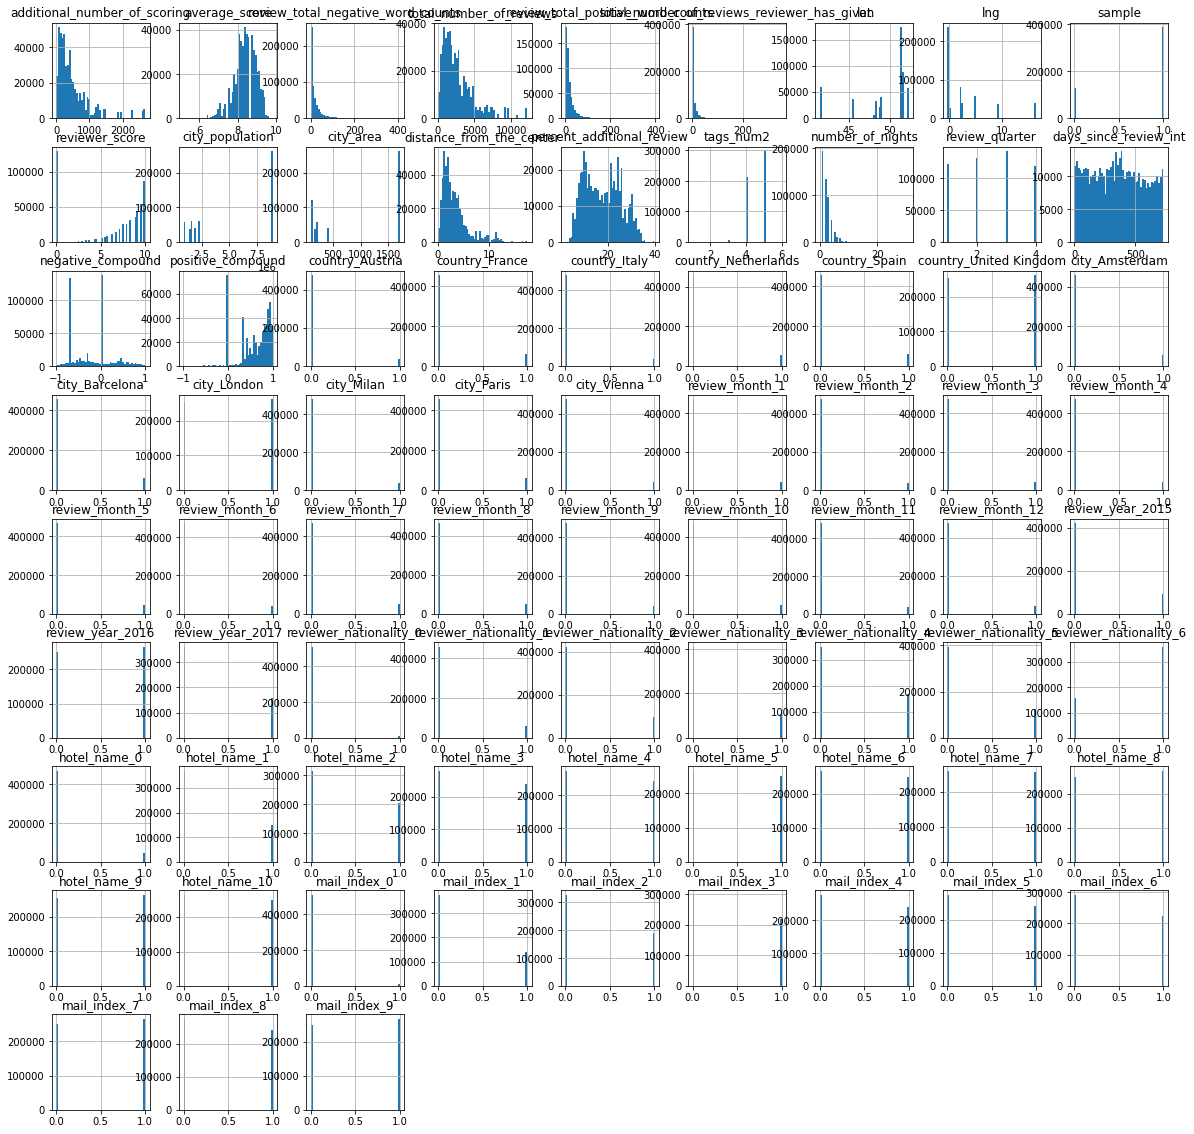

In [72]:

data3.hist(bins=50, figsize=(20,20))
plt.show()

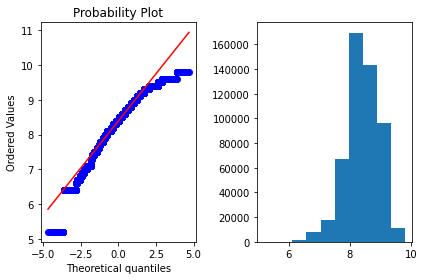

In [73]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data3['average_score'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data3['average_score']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

<AxesSubplot:>

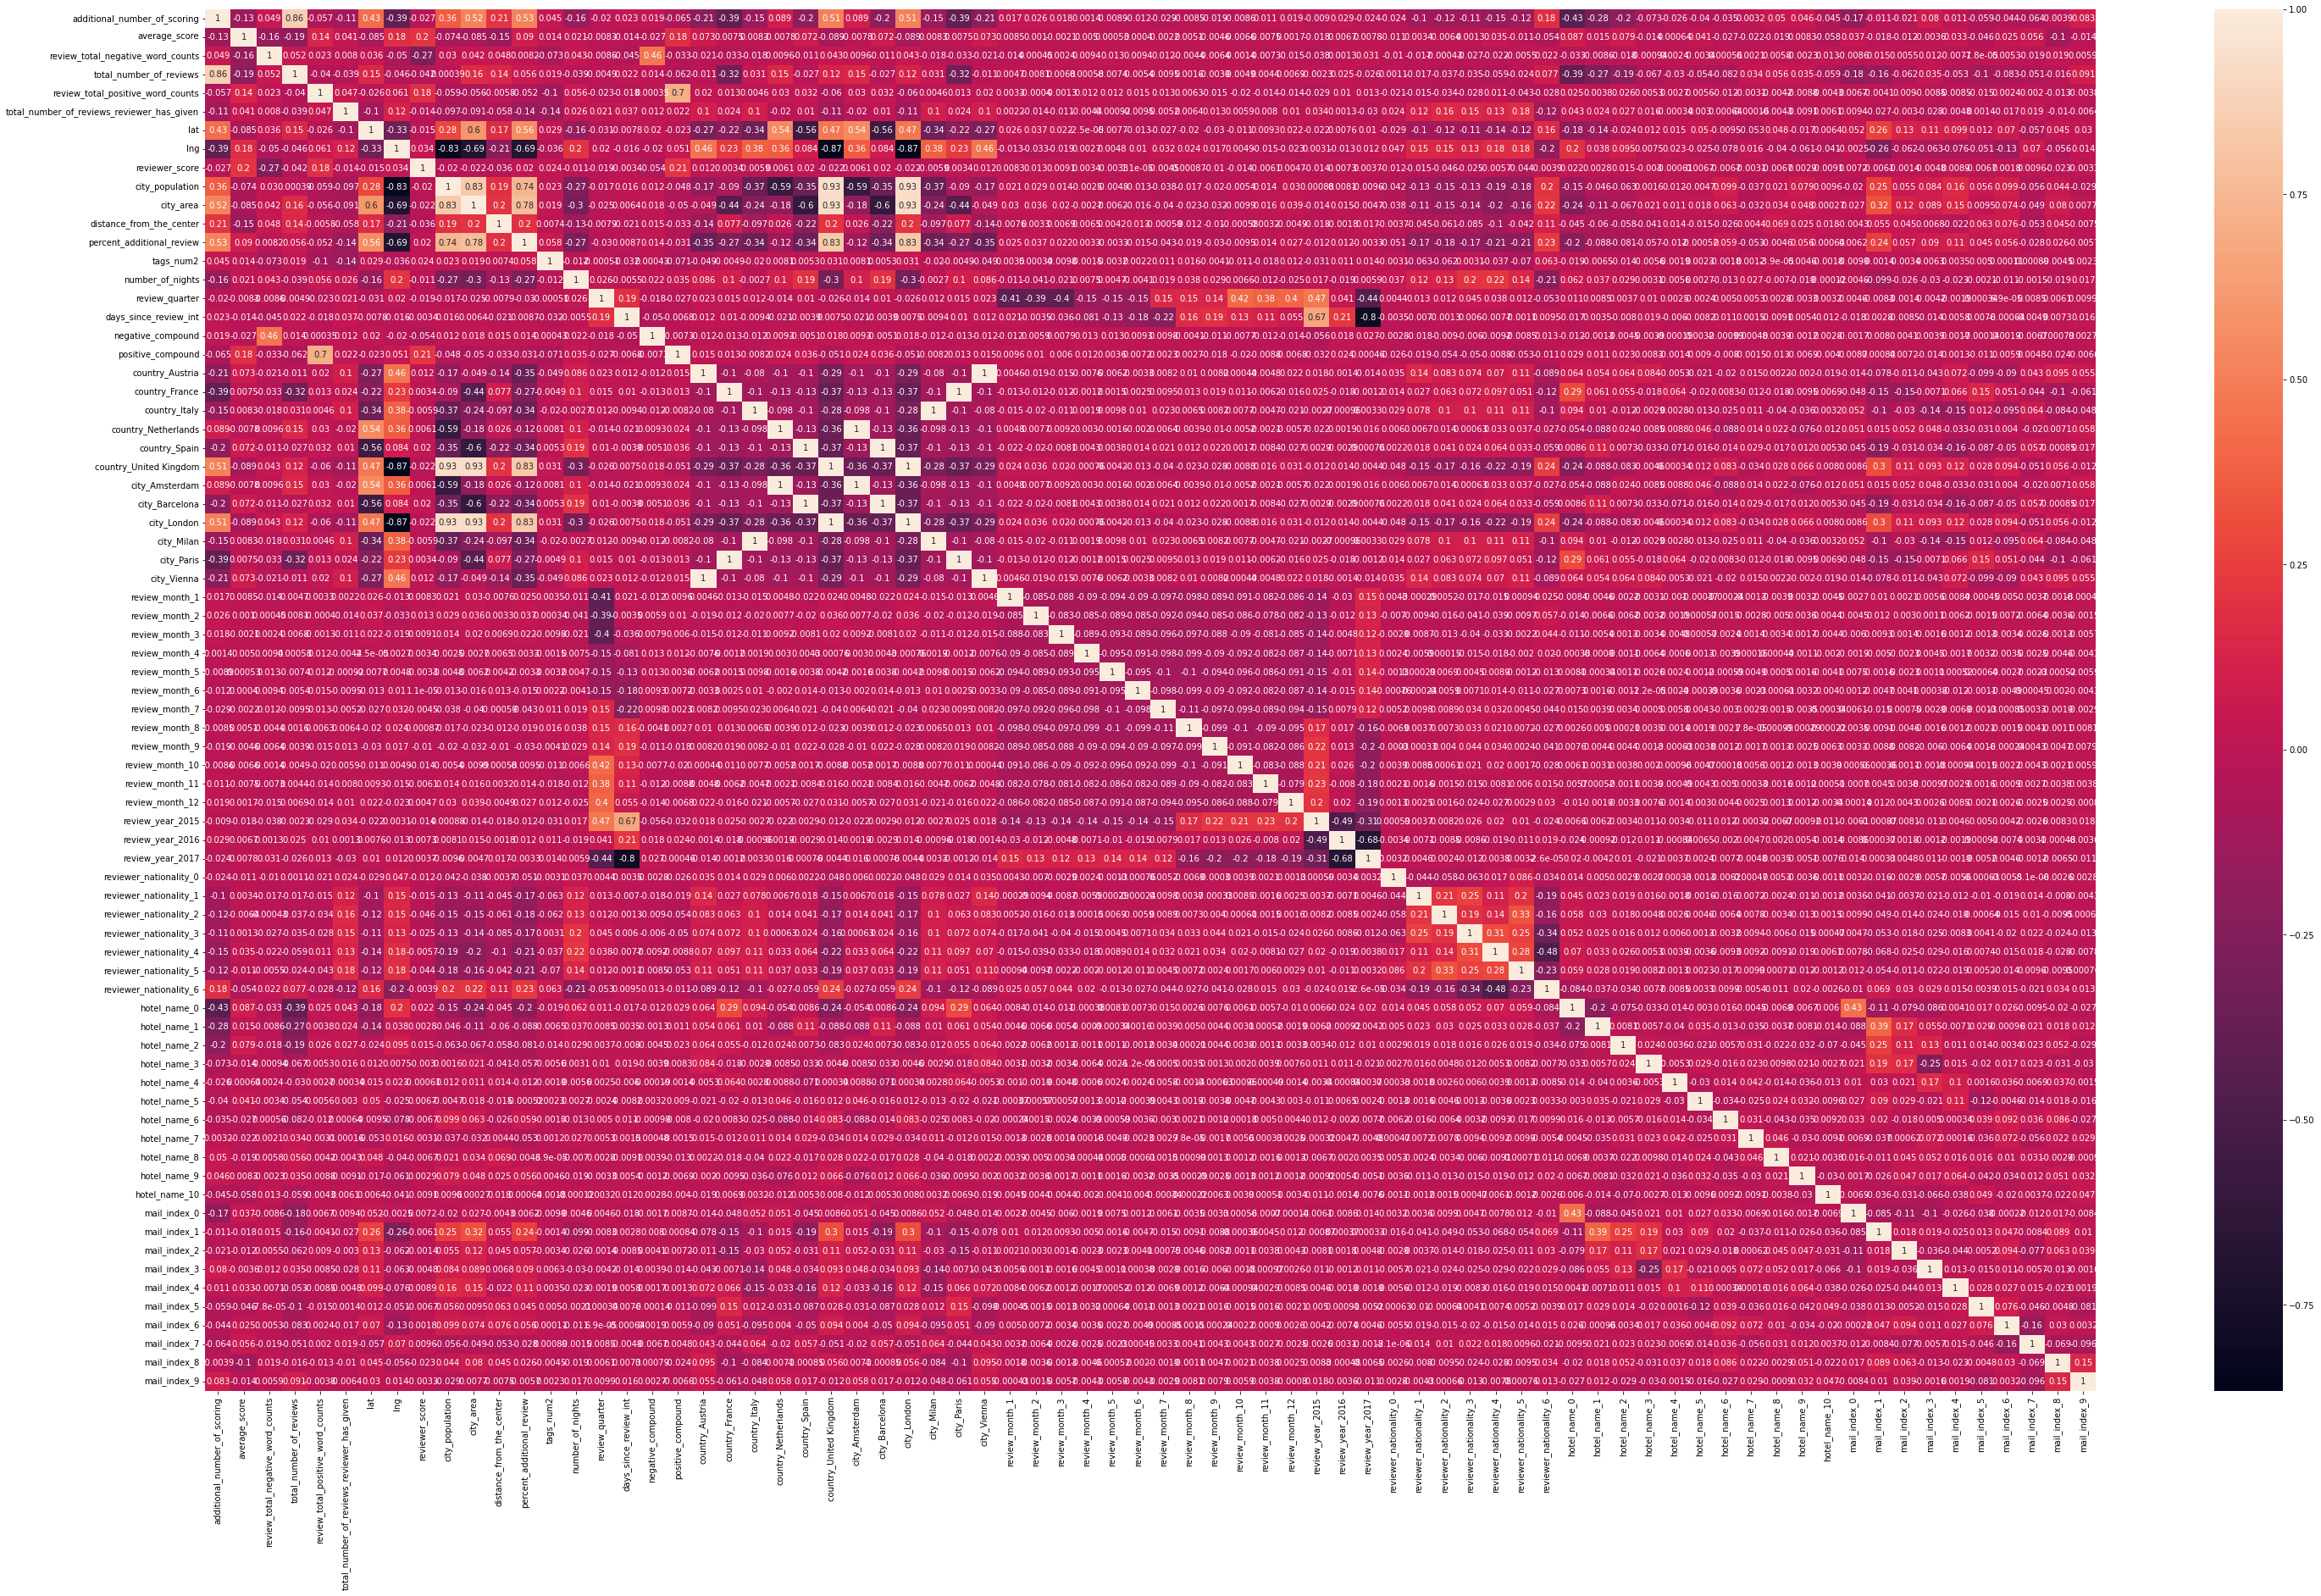

In [74]:
plt.rcParams['figure.figsize'] = (50,30)
sns.heatmap(data3.drop(['sample'], axis=1).corr(method = 'spearman'), annot=True)

Удаляю один из пары признаков с высокой корреляцией





In [75]:
data3.drop(['days_since_review_int', 'lng', 'additional_number_of_scoring', 'country_Austria', 'country_France', 'country_Italy', 'country_Netherlands', 'country_Spain', 'country_United Kingdom'],axis = 1, inplace=True)


In [76]:
data3.drop(['сity_population', 'сity_area'], axis = 1, inplace=True) 


In [77]:
data3.drop(['review_total_positive_word_counts', 'percent_additional_review'], axis = 1, inplace=True) 


In [191]:
# Теперь выделим тестовую часть
train_data = data3.query('sample == 1').drop(['sample'], axis=1)
test_data = data3.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [192]:
num_cols = ['average_score','total_number_of_reviews', 
            'review_total_negative_word_counts', 'total_number_of_reviews_reviewer_has_given', 
            'lat', 'tags_num2', 'distance_from_the_center', 'number_of_nights', 'review_quarter', 
            'negative_compound','positive_compound']

cat_cols = [s for s in X.columns if s not in num_cols]

In [ ]:
y=y.astype('int')

...
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [ ]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [193]:
data3 = data3.drop(['number_of_nights', 'review_quarter', 'lat', 'review_month_5', 'review_month_6', 'review_month_8',
                     'review_month_8', 'mail_index_2', 'mail_index_9', 'mail_index_6',
                    'hotel_name_9', 'hotel_name_7', 'hotel_name_8', 'hotel_name_4', 'hotel_name_3'],axis=1)

KeyError: "['number_of_nights' 'review_quarter' 'lat' 'review_month_5'\n 'review_month_6' 'review_month_8' 'review_month_8' 'mail_index_2'\n 'mail_index_9' 'mail_index_6' 'hotel_name_9' 'hotel_name_7'\n 'hotel_name_8' 'hotel_name_4' 'hotel_name_3'] not found in axis"

****НОРМАЛИЗАЦИЯ ПРИЗНАКОВ****

In [78]:
# для нормализации, стандартизации
from sklearn import preprocessing


In [194]:
data3.reviewer_score

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
515733    8.8
515734    9.2
515735    8.3
515736    9.2
515737    8.8
Name: reviewer_score, Length: 515738, dtype: float64

In [195]:
data4 = data3.copy()

In [196]:
data4 = data4.drop(['sample', 'reviewer_score'], axis=1)

In [197]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               515738 non-null  float64
 1   review_total_negative_word_counts           515738 non-null  int64  
 2   total_number_of_reviews                     515738 non-null  int64  
 3   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 4   distance_from_the_center                    515738 non-null  float64
 5   tags_num2                                   515738 non-null  int64  
 6   negative_compound                           515738 non-null  float64
 7   positive_compound                           515738 non-null  float64
 8   city_Amsterdam                              515738 non-null  uint8  
 9   city_Barcelona                              515738 non-null  uint8  
 

In [198]:
df_sample = data3[['sample', 'reviewer_score']]

In [131]:
df_sample

,sample,reviewer_score
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
515733,1,8.8
515734,1,9.2
515735,1,8.3
515736,1,9.2


In [199]:
data4.columns

Index(['average_score', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'total_number_of_reviews_reviewer_has_given',
       'distance_from_the_center', 'tags_num2', 'negative_compound',
       'positive_compound', 'city_Amsterdam', 'city_Barcelona', 'city_London',
       'city_Milan', 'city_Paris', 'city_Vienna', 'review_month_1',
       'review_month_2', 'review_month_3', 'review_month_4', 'review_month_7',
       'review_month_9', 'review_month_10', 'review_month_11',
       'review_month_12', 'review_year_2015', 'review_year_2016',
       'review_year_2017', 'reviewer_nationality_0', 'reviewer_nationality_1',
       'reviewer_nationality_2', 'reviewer_nationality_3',
       'reviewer_nationality_4', 'reviewer_nationality_5',
       'reviewer_nationality_6', 'hotel_name_0', 'hotel_name_1',
       'hotel_name_2', 'hotel_name_5', 'hotel_name_6', 'hotel_name_10',
       'mail_index_0', 'mail_index_1', 'mail_index_3', 'mail_index_4',
       'mail_index_5', 'mail_i

,average_score,review_total_negative_word_counts,total_number_of_reviews,total_number_of_reviews_reviewer_has_given,lat,distance_from_the_center,tags_num2,number_of_nights,review_quarter,negative_compound,...,mail_index_0,mail_index_1,mail_index_2,mail_index_3,mail_index_4,mail_index_5,mail_index_6,mail_index_7,mail_index_8,mail_index_9
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,...,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,8.397487,18.539450,2701.035058,7.166001,49.432406,3.202144,4.569359,2.361377,2.503409,-0.202960,...,0.018977,0.272538,0.368738,0.422748,0.463132,0.467929,0.436154,0.514389,0.466910,0.517172
std,0.548048,29.690831,2163.436400,11.040228,3.460241,2.527813,0.520187,1.647423,1.088472,0.456506,...,0.136443,0.445265,0.482463,0.493996,0.498639,0.498971,0.495907,0.499793,0.498904,0.499706
min,5.200000,0.000000,43.000000,1.000000,41.328376,0.030000,1.000000,0.000000,1.000000,-0.998100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.100000,2.000000,1161.000000,1.000000,48.214066,1.420000,4.000000,1.000000,2.000000,-0.709600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.400000,9.000000,2134.000000,3.000000,51.499981,2.510000,5.000000,2.000000,3.000000,-0.153100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,8.800000,23.000000,3613.000000,8.000000,51.516288,4.090000,5.000000,3.000000,3.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.800000,408.000000,12158.000000,355.000000,52.400181,17.300000,6.000000,31.000000,4.000000,0.996000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


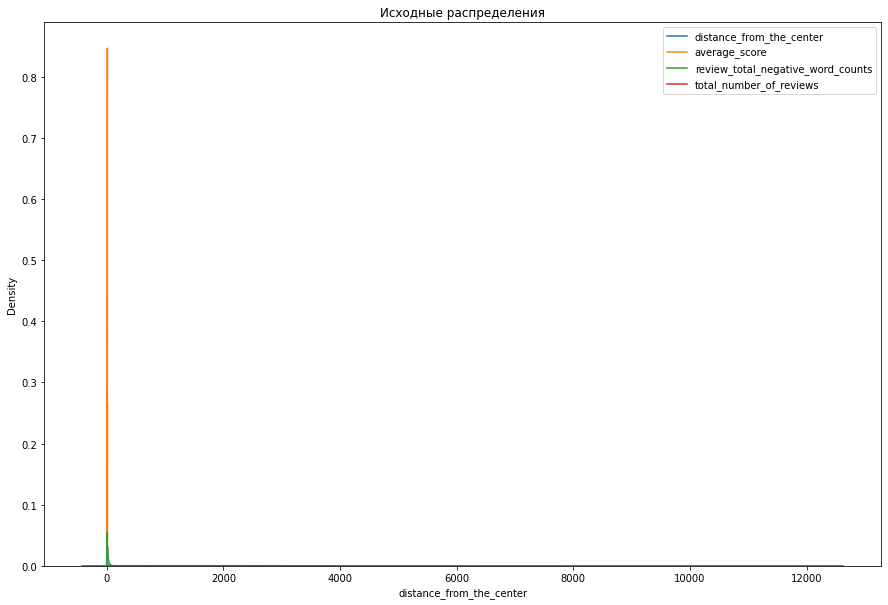

In [132]:

#Рассмотрим распределения на графике. Метод визуализации kdeplot() — это метод визуализации #распределения наблюдений в наборе данных.
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(15, 10))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(data4['distance_from_the_center'], ax=ax1, label ='distance_from_the_center')
sns.kdeplot(data4['average_score'], ax=ax1, label ='average_score')
sns.kdeplot(data4['review_total_negative_word_counts'], ax=ax1, label ='review_total_negative_word_counts')
sns.kdeplot(data4['total_number_of_reviews'], ax=ax1, label ='total_number_of_reviews')
plt.legend()

#Зафиксируем описательные статистики до преобразований.
data4.describe()

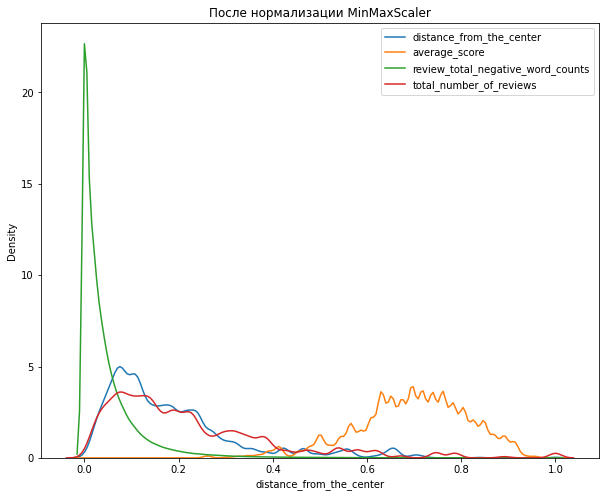

In [200]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(data4)

col_names = data4.columns
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['distance_from_the_center'], ax=ax1, label ='distance_from_the_center')
sns.kdeplot(df_mm['average_score'], ax=ax1, label ='average_score')
sns.kdeplot(df_mm['review_total_negative_word_counts'], ax=ax1, label ='review_total_negative_word_counts')
sns.kdeplot(df_mm['total_number_of_reviews'], ax=ax1, label ='total_number_of_reviews')
plt.legend()



<AxesSubplot:>

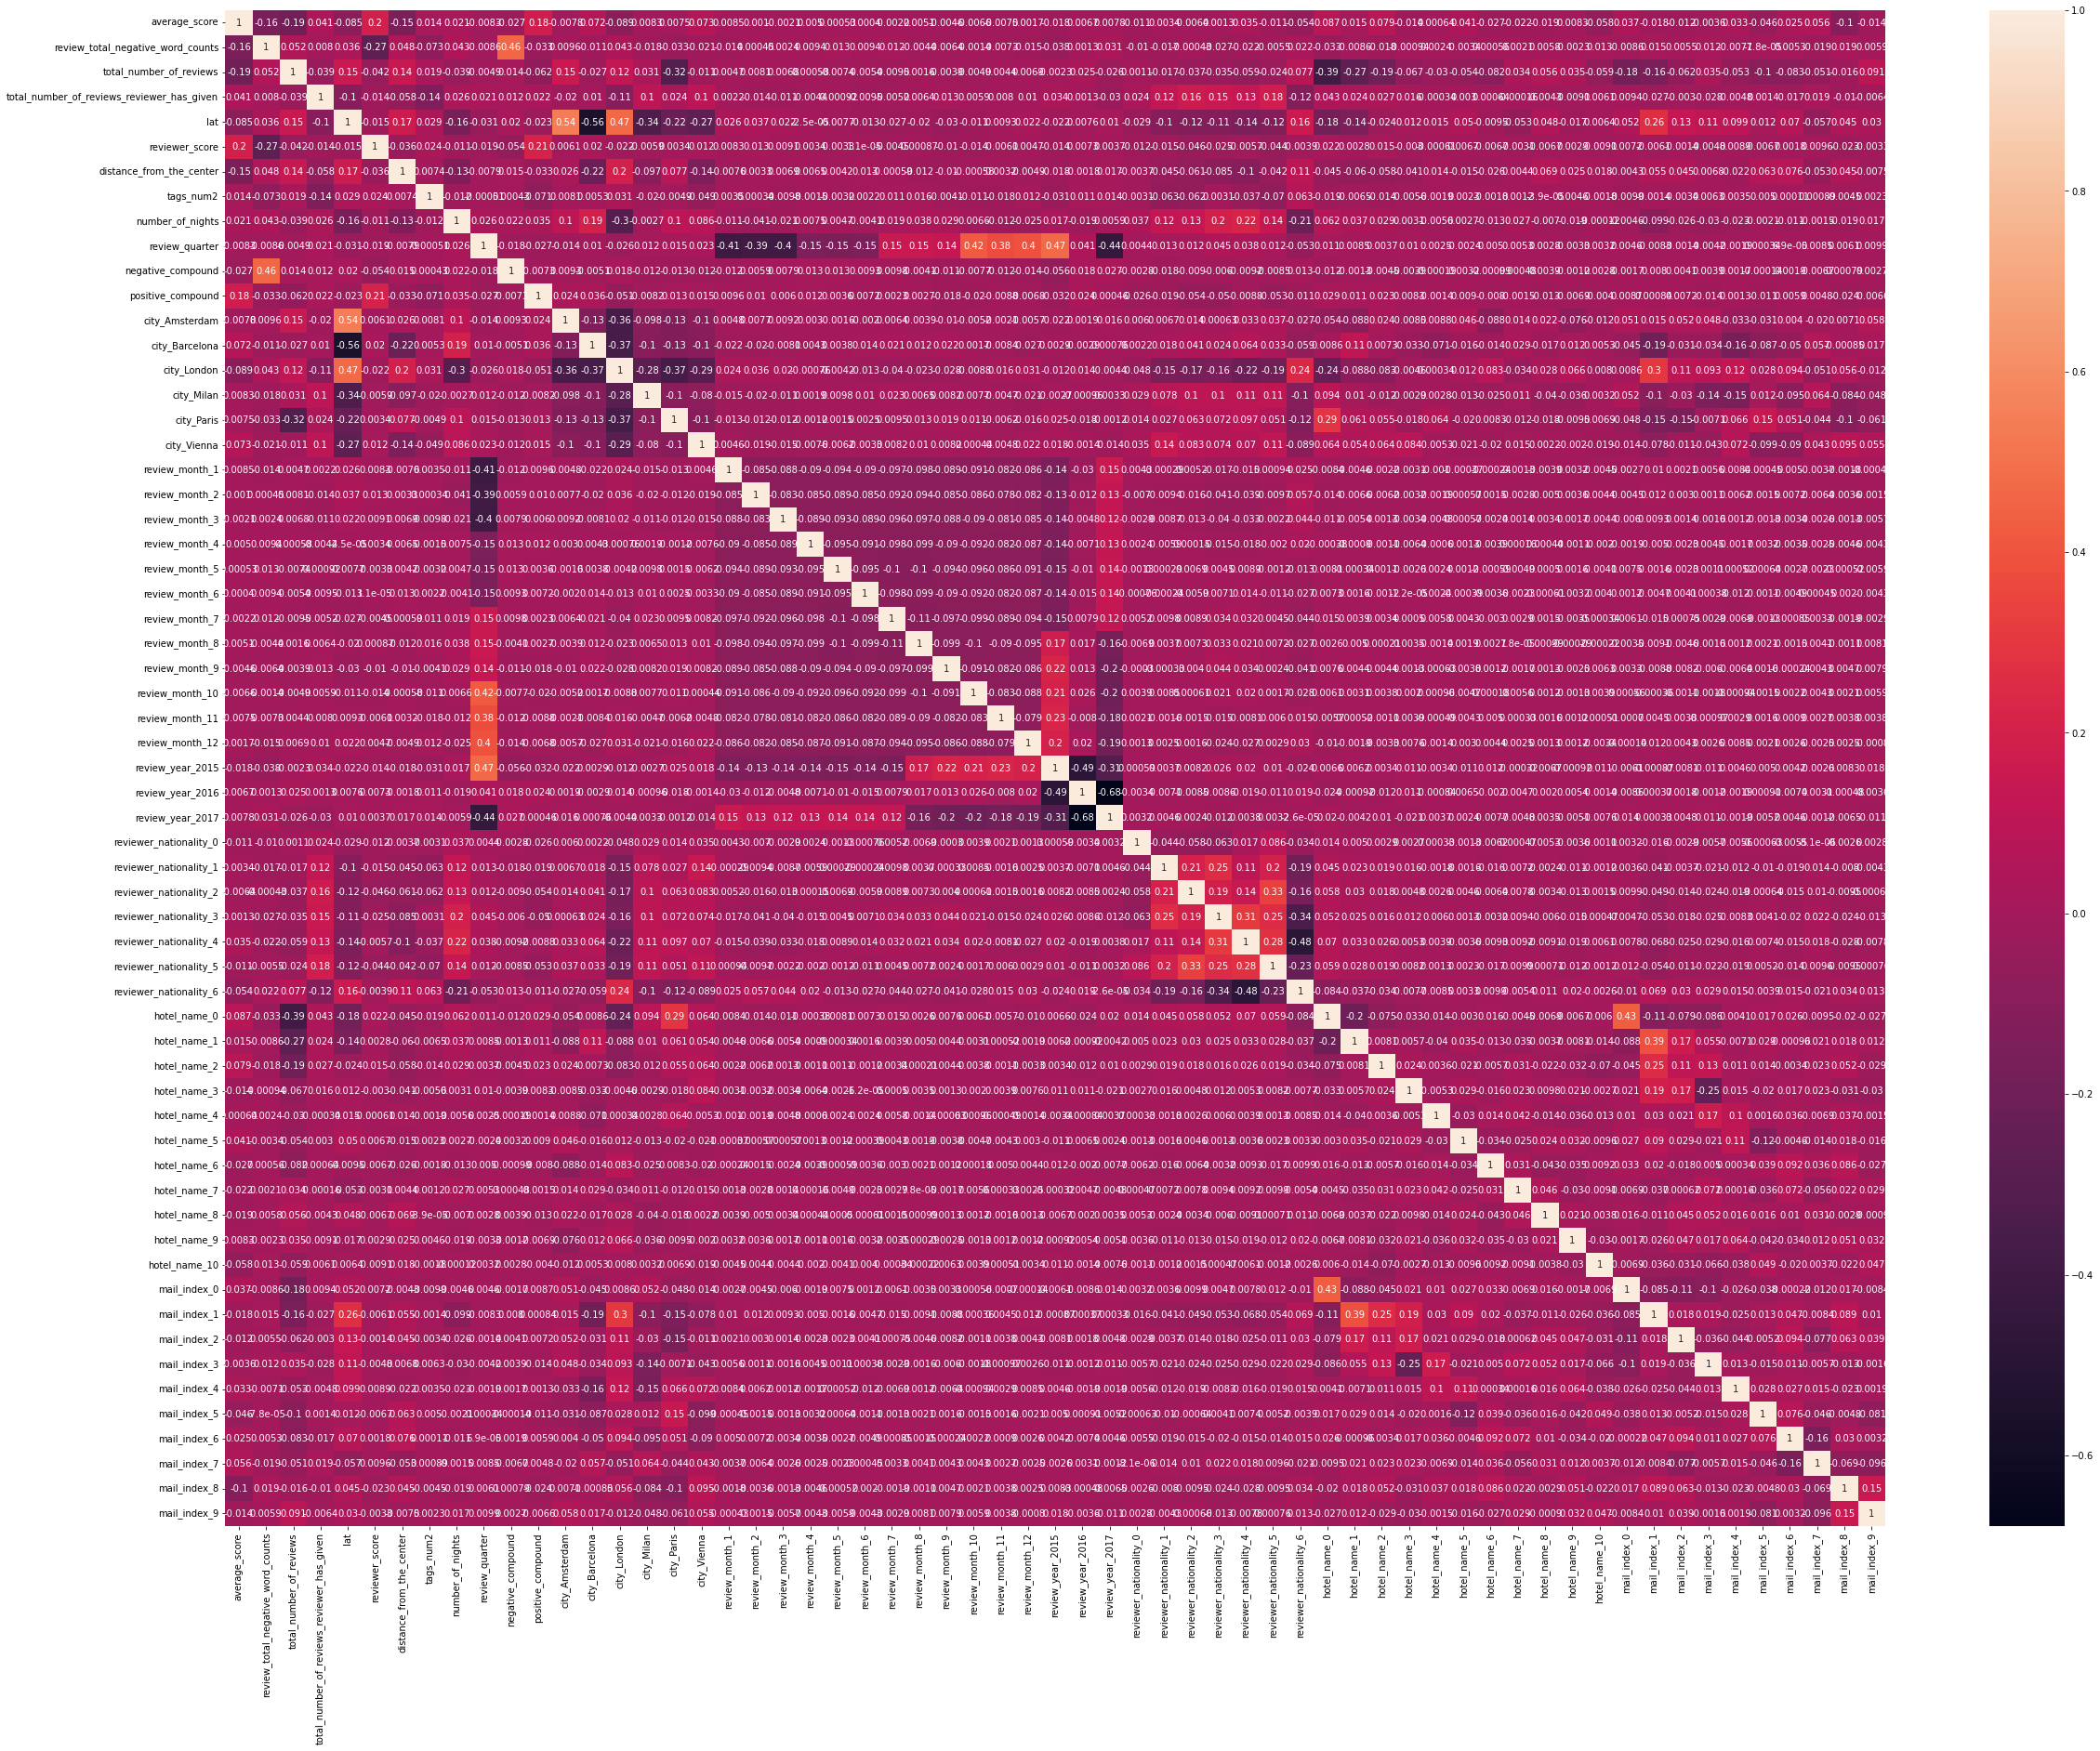

In [85]:
plt.rcParams['figure.figsize'] = (40,30)
sns.heatmap(df_mm.corr(method = 'spearman'), annot=True)

In [86]:
#data5 = df_mm.join(df_sample, how='left')

In [201]:
data5 = pd.concat([df_mm, df_sample], axis = 1)

In [137]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 62 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               515738 non-null  float64
 1   review_total_negative_word_counts           515738 non-null  float64
 2   total_number_of_reviews                     515738 non-null  float64
 3   total_number_of_reviews_reviewer_has_given  515738 non-null  float64
 4   lat                                         515738 non-null  float64
 5   distance_from_the_center                    515738 non-null  float64
 6   tags_num2                                   515738 non-null  float64
 7   number_of_nights                            515738 non-null  float64
 8   review_quarter                              515738 non-null  float64
 9   negative_compound                           515738 non-null  float64
 

In [202]:
# Теперь выделим тестовую часть
train_data = data5.query('sample == 1').drop(['sample'], axis=1)
test_data = data5.query('sample == 0').drop(['sample'], axis=1)



In [140]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386803 entries, 128935 to 515737
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               386803 non-null  float64
 1   review_total_negative_word_counts           386803 non-null  float64
 2   total_number_of_reviews                     386803 non-null  float64
 3   total_number_of_reviews_reviewer_has_given  386803 non-null  float64
 4   lat                                         386803 non-null  float64
 5   distance_from_the_center                    386803 non-null  float64
 6   tags_num2                                   386803 non-null  float64
 7   number_of_nights                            386803 non-null  float64
 8   review_quarter                              386803 non-null  float64
 9   negative_compound                           386803 non-null  floa

In [203]:
y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [142]:
train_data['reviewer_score']

128935    10.0
128936     6.3
128937     7.5
128938    10.0
128939     9.6
          ... 
515733     8.8
515734     9.2
515735     8.3
515736     9.2
515737     8.8
Name: reviewer_score, Length: 386803, dtype: float64

In [204]:
train_data['reviewer_score'].values

array([10. ,  6.3,  7.5, ...,  8.3,  9.2,  8.8])

In [205]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [206]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 47), (386803, 47), (386803, 46), (309442, 46), (77361, 46))

In [146]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [207]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [208]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.1s finished


In [209]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.8998278892601359


In [210]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

print('MAPE:', MAPE(y_test, y_pred))

MAPE: 12.858176058998572


<AxesSubplot:>

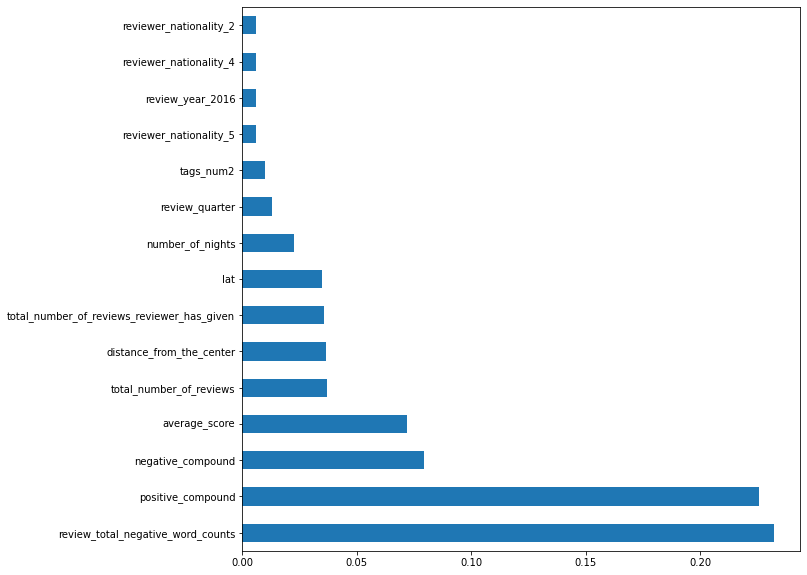

In [152]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [101]:
test_data.sample(10)

,average_score,review_total_negative_word_counts,total_number_of_reviews,total_number_of_reviews_reviewer_has_given,lat,reviewer_score,distance_from_the_center,tags_num2,number_of_nights,review_quarter,...,mail_index_0,mail_index_1,mail_index_2,mail_index_3,mail_index_4,mail_index_5,mail_index_6,mail_index_7,mail_index_8,mail_index_9
97184,0.652174,0.014706,0.082790,0.005650,0.918178,0.0,0.108859,0.8,0.032258,0.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
62851,0.891304,0.000000,0.001403,0.014124,0.680063,0.0,0.017371,0.8,0.096774,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
25030,0.652174,0.053922,0.290962,0.005650,0.994129,0.0,0.242038,0.6,0.096774,0.333333,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
107398,0.804348,0.000000,0.107883,0.000000,0.621011,0.0,0.050955,0.8,0.129032,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
54092,0.782609,0.034314,0.101114,0.045198,0.918193,0.0,0.108280,0.6,0.032258,0.666667,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
58869,0.826087,0.269608,0.159389,0.002825,0.919288,0.0,0.535611,0.6,0.032258,1.000000,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
91643,0.869565,0.029412,0.047462,0.008475,0.682186,0.0,0.185292,0.6,0.064516,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
47771,0.630435,0.007353,0.786215,0.005650,0.919699,0.0,0.067169,0.8,0.032258,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
120757,0.760870,0.068627,0.028890,0.022599,0.918119,0.0,0.141285,0.6,0.064516,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23576,0.804348,0.000000,0.583161,0.000000,0.992250,0.0,0.389114,0.8,0.129032,0.666667,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0


In [102]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [103]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [104]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.7s finished


In [105]:
predict_submission

array([0.8707, 0.7485, 0.8609, ..., 0.7611, 0.9593, 0.7221])

In [106]:
list(sample_submission)

['reviewer_score', 'id']

In [107]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,0.8707,488440
1,0.7485,274649
2,0.8609,374688
3,0.9700,404352
4,0.9733,451596
5,0.9009,302161
6,0.7698,317079
7,0.7521,13963
8,0.8270,159785
9,0.6336,195089
